<a href="https://colab.research.google.com/github/Ahmed-Shatla/Predicting-disaster-tweets-using-LSTM/blob/main/AMIT_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1)Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [2]:
train_data = pd.read_csv("train.csv")


#2)Check head and info of the data

In [3]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


#3) Is there a missing data [how many and the percentage if there]?

In [4]:
train_data.shape

(7613, 5)

In [5]:
total_missing_values = train_data.isna().sum().sum()
##number of missing values
total_missing_values

2594

In [6]:
percentage_of_missing_valeus = (total_missing_values/train_data.shape[0])*100
##percentage of nulls
percentage_of_missing_valeus

34.073295678444765

#4) How many data in each class?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


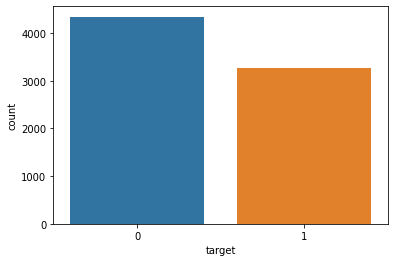

In [7]:
sns.countplot(train_data['target'])

#5) Get the top 15 locations of the data (Disaster & Not Disaster)

In [8]:
train_data['location'].value_counts().head(15)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
Name: location, dtype: int64

In [9]:
disaster_locations = train_data[train_data['target']==1]['location'].value_counts()[:15]
disaster_locations

USA                 67
United States       27
Nigeria             22
India               20
Mumbai              19
UK                  16
London              16
New York            16
Washington, DC      15
Canada              13
Worldwide           12
Washington, D.C.     9
Chicago, IL          9
Australia            9
Indonesia            8
Name: location, dtype: int64

In [10]:
not_disaster_locations = train_data[train_data['target']==0]['location'].value_counts()[:15]
not_disaster_locations

New York           55
USA                37
London             29
United States      23
Los Angeles, CA    18
Canada             16
Kenya              15
Everywhere         12
Florida            11
UK                 11
California         10
NYC                10
United Kingdom     10
ss                  9
London, England     9
Name: location, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


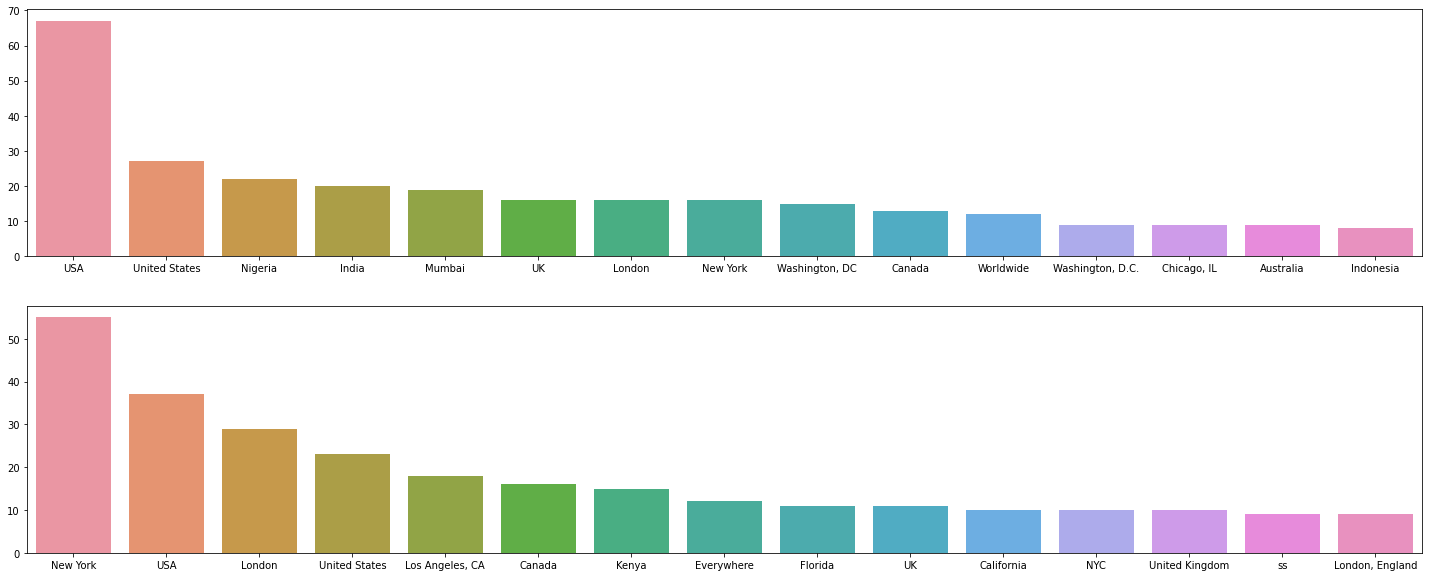

In [11]:
plt.figure(figsize=(25,10))

plt.subplot(2,1,1)
sns.barplot(disaster_locations.index,disaster_locations.values)

plt.subplot(2,1,2)
sns.barplot(not_disaster_locations.index,not_disaster_locations.values)


#6) Get the top 15 keyword in the data (Disaster & Not Disaster)

In [12]:
disaster_keywords = train_data[train_data['target']==1]['keyword'].value_counts()[:15]
disaster_keywords

derailment             39
wreckage               39
outbreak               39
debris                 37
oil%20spill            37
typhoon                37
evacuated              32
suicide%20bombing      32
rescuers               32
suicide%20bomb         32
nuclear%20disaster     31
razed                  31
suicide%20bomber       30
earthquake             30
airplane%20accident    30
Name: keyword, dtype: int64

In [13]:
not_disaster_keywords = train_data[train_data['target']==0]['keyword'].value_counts()[:15]
not_disaster_keywords

body%20bags    40
harm           37
armageddon     37
wrecked        36
ruin           36
deluge         36
explode        35
twister        35
fear           35
siren          35
aftershock     34
panic          34
screaming      34
blizzard       33
blazing        33
Name: keyword, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


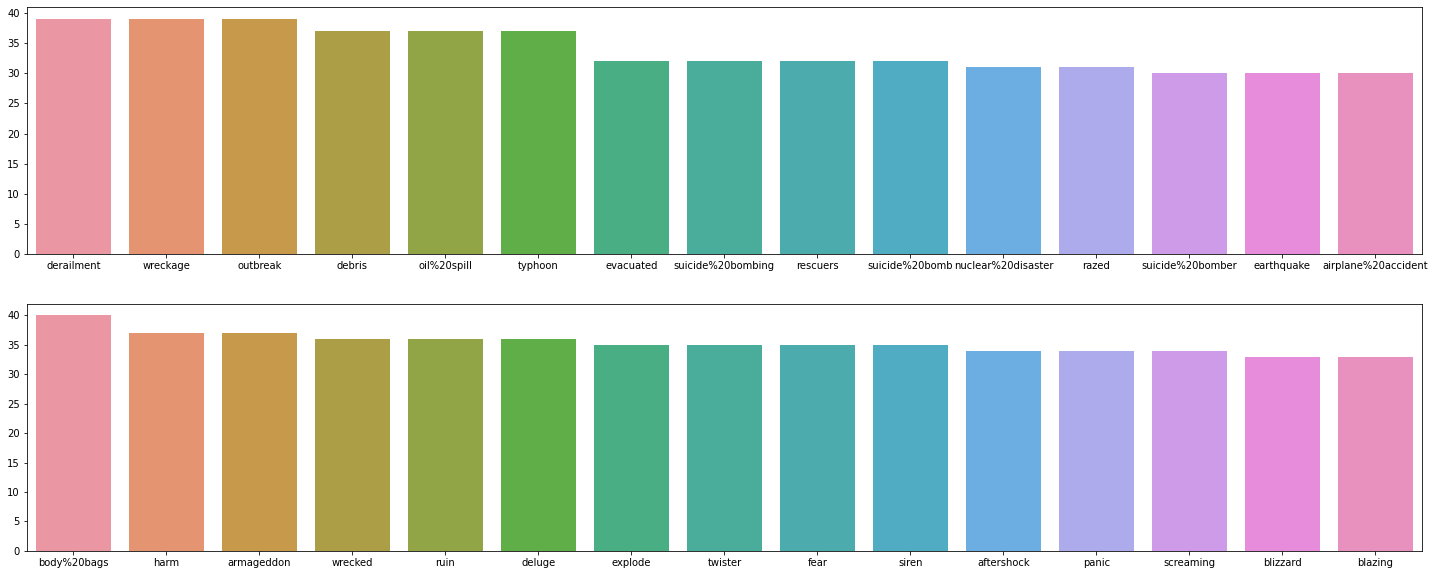

In [14]:
plt.figure(figsize=(25,10))

plt.subplot(2,1,1)
sns.barplot(disaster_keywords.index,disaster_keywords.values)

plt.subplot(2,1,2)
sns.barplot(not_disaster_keywords.index,not_disaster_keywords.values)


#7) What are the most common words?

####cleaning tweets

In [15]:
import re
tweets = train_data['text']
for i in range(1,10,1):
  print(tweets[i])

Forest fire near La Ronge Sask. Canada
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
13,000 people receive #wildfires evacuation orders in California 
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
I'm on top of the hill and I can see a fire in the woods...
There's an emergency evacuation happening now in the building across the street
I'm afraid that the tornado is coming to our area...


In [16]:
def removing_unicodes(word):
  temp = word.encode("ascii", "ignore")
  temp = temp.decode()
  return temp

In [17]:
def clean_texts(text):
  text = re.sub(r'#\w*','',text) #removing hashtags
  text = re.sub(r'@\w*','',text) #removing menthions
  text = re.sub(r'https?:\S*','',text) #removing links
  text = re.sub(r'\d+','',text) #removing numbers
  text = re.sub(r'\W+',' ',text) #removing non words like (- , :)
  text = re.sub(r'_','',text) #removing underscore symbol
  text = re.sub(r'^\s','',text) #removing spaces at the begain of the sentences
  text = re.sub(r'\s$','',text) #removing spaces at the end of the sentences


  return text

###Removing unicode characters

In [18]:
no_uni_tweets = []
for tweet in tweets:
  no_uni_tweets.append(removing_unicodes(tweet))

In [19]:
cleaned_tweets = []
for tweet in no_uni_tweets:
  cleaned_tweets.append(clean_texts(tweet))

In [20]:
tweets = []
for tweet in cleaned_tweets:
  tweets.append(tweet.split())

In [21]:
words = []
for sentence in tweets:
  for word in sentence:
    words.append(word)


In [22]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

def remove_stopwords(words):
  non_stop_words = []
  for word in words:
    if word.lower() not in stop_words:
      non_stop_words.append(word)
  return non_stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
words_without_stop_words = remove_stopwords(words)

In [24]:
from collections import Counter
count_words = Counter(words_without_stop_words).most_common(15)
count_words

[('amp', 344),
 ('like', 324),
 ('via', 213),
 ('get', 184),
 ('fire', 174),
 ('people', 166),
 ('one', 158),
 ('would', 124),
 ('California', 113),
 ('got', 106),
 ('new', 106),
 ('know', 104),
 ('New', 104),
 ('video', 101),
 ('day', 100)]

In [25]:
x = []
y = []
for i in range(len(count_words)):
    x.append(count_words[i][0])
for i in range(len(count_words)):
    y.append(count_words[i][1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


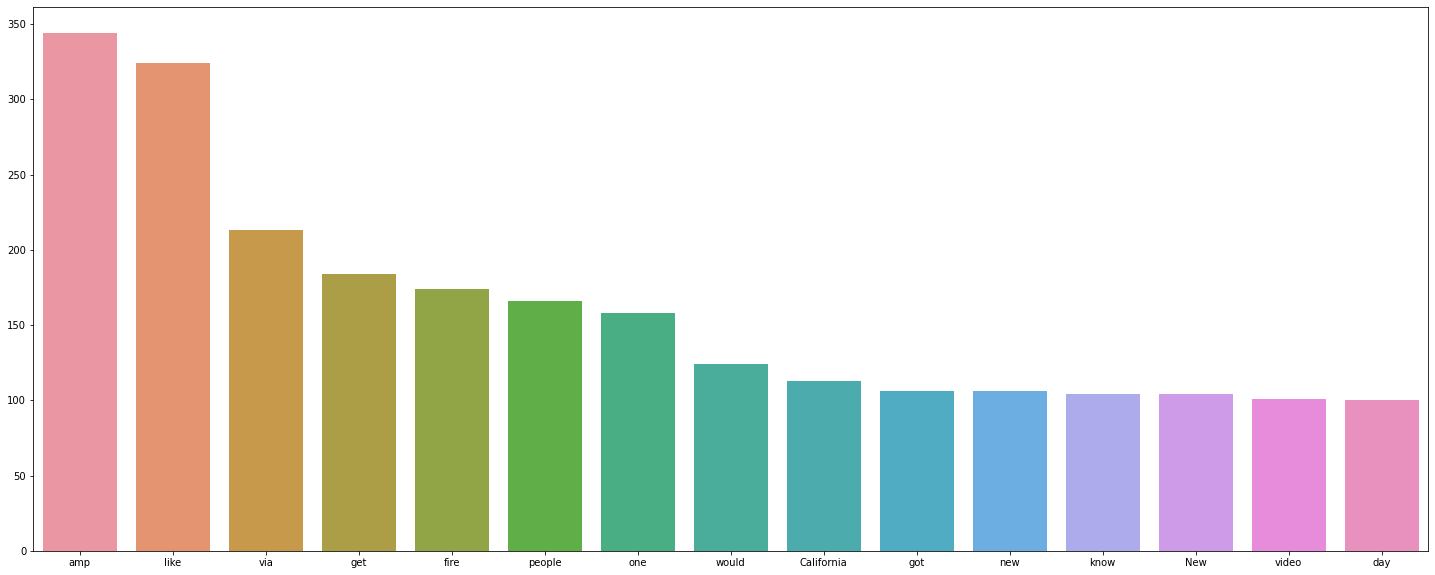

In [26]:
plt.figure(figsize=(25,10))
sns.barplot(x,y)

#8)What are the most common stop words?

In [27]:
def count_stop_words(words):
  swords = []
  for word in words:
    if word in stop_words:
      swords.append(word)
  return swords

In [28]:
stop_words_in_text = count_stop_words(words)
count_stop_words = Counter(stop_words_in_text).most_common(15)
count_stop_words

[('the', 2603),
 ('a', 1890),
 ('to', 1819),
 ('in', 1782),
 ('of', 1738),
 ('and', 1320),
 ('for', 829),
 ('is', 827),
 ('s', 803),
 ('on', 798),
 ('you', 749),
 ('it', 611),
 ('that', 555),
 ('my', 552),
 ('with', 518)]

In [29]:
x = []
y = []
for i in range(len(count_stop_words)):
    x.append(count_stop_words[i][0])
for i in range(len(count_stop_words)):
    y.append(count_stop_words[i][1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


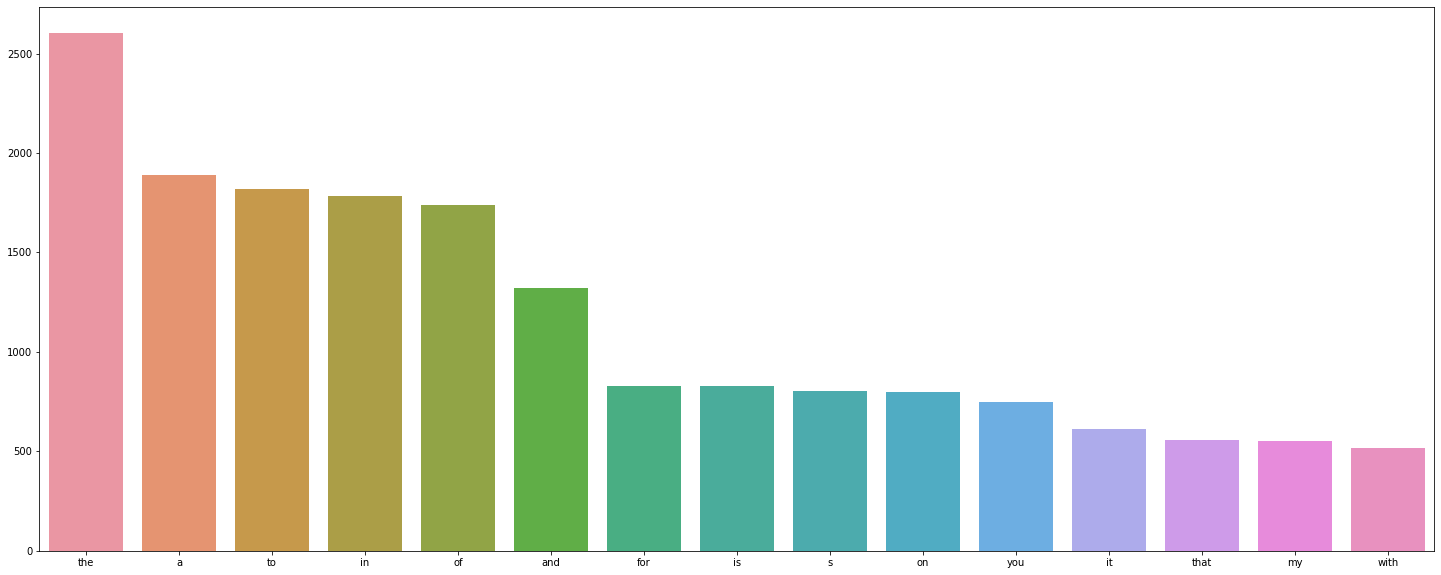

In [30]:
plt.figure(figsize=(25,10))
sns.barplot(x,y)

#9)Use nlp to prepare dataset [tokenization, pad sequence, etc.]

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [32]:
##removing stopwords from training data
for tweet in tweets:
  for word in tweet:
    if word.lower() in stop_words or word in stop_words:
      tweet.remove(word)

###using Tokenizer to make all sentences as numercal value

In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)
sequences[:2]

[[4101, 1, 773, 37, 85, 2632, 4102, 40], [139, 10, 170, 715, 5936, 5937, 1278]]

###using pad sequances to make all sentences has the same size based on the longest sentence

In [34]:
padded_sequences = pad_sequences(sequences,maxlen=30)
padded_sequences[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        4101,    1,  773,   37,   85, 2632, 4102,   40],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  139,   10,  170,  715, 5936, 5937, 1278]], dtype=int32)

#10) Prepare train, test sets

In [35]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [36]:
text = test_data['text']

In [37]:
##removing unicodes characters
no_uni_tweets_test = []
for tweet in text:
  no_uni_tweets_test.append(removing_unicodes(tweet))

In [38]:
##Cleaning
cleaned_tweets_test = []
for tweet in no_uni_tweets_test:
  cleaned_tweets_test.append(clean_texts(tweet))

In [39]:
##Split all tweets
tweets_test = []
for tweet in cleaned_tweets_test:
  tweets_test.append(tweet.split())

In [40]:
##removing stopwords from test data
for tweet in tweets_test:
  for word in tweet:
    if word.lower() in stop_words or word in stop_words:
      tweet.remove(word)

In [41]:
tokenizer_test = Tokenizer()
tokenizer_test.fit_on_texts(tweets_test)
sequences_test = tokenizer_test.texts_to_sequences(tweets_test)
sequences_test[:2]

[[500, 897, 78, 53], [211, 14, 1749, 1013, 658, 816, 358]]

In [42]:
padded_sequences_test = pad_sequences(sequences_test,maxlen=30)
padded_sequences_test[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  500,  897,   78,   53],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  211,   14, 1749, 1013,  658,  816,  358]], dtype=int32)

In [43]:
train = padded_sequences
test = padded_sequences_test

In [44]:
X_train = np.array(train)
y_train = np.array(train_data['target'])
y_train = y_train.reshape(-1,1)

In [45]:
y_train.shape

(7613, 1)

In [46]:
#vocab size
vocab_size = len(tokenizer.word_index)
vocab_size

12956

In [47]:
##split to train and validation to evaluate the model
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

#11)Train your LSTM structure

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
import tensorflow as tf
model = Sequential()
model.add(Embedding(vocab_size+1,10,input_length=30))

model.add(LSTM(512))


model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 10)            129570    
                                                                 
 lstm (LSTM)                 (None, 512)               1071104   
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 1,201,187
Trainable params: 1,201,187
Non-trainable params: 0
_________________________________________________________________


In [49]:
X_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0, 10729,  4623,  2985,   115,   432,   156,    61,  1062,
         230,  3910,  5542], dtype=int32)

In [50]:
y_train[0]

array([1])

In [51]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_val,y_val),verbose=1)

Epoch 1/5
191/191 [==============================] - 88s 431ms/step - loss: 0.6068 - accuracy: 0.6631 - val_loss: 0.4746 - val_accuracy: 0.7873
Epoch 2/5
191/191 [==============================] - 77s 403ms/step - loss: 0.3694 - accuracy: 0.8450 - val_loss: 0.4936 - val_accuracy: 0.7728
Epoch 3/5
191/191 [==============================] - 76s 396ms/step - loss: 0.2573 - accuracy: 0.8979 - val_loss: 0.5272 - val_accuracy: 0.7669
Epoch 4/5
191/191 [==============================] - 76s 395ms/step - loss: 0.1709 - accuracy: 0.9328 - val_loss: 0.6448 - val_accuracy: 0.7610
Epoch 5/5
191/191 [==============================] - 75s 395ms/step - loss: 0.1223 - accuracy: 0.9540 - val_loss: 0.7910 - val_accuracy: 0.7485


#12) Evaluate the model and make predictions

In [52]:
predictions = model.predict(test)
predictions[0]

array([0.01309618], dtype=float32)

In [53]:
Output = []
for pred in predictions:
  if pred > 0.5:
    Output.append(1)
  else:
    Output.append(0)

In [54]:
test_predictions = {'Texts':test_data['text'],'Predicitions':Output}
results = pd.DataFrame(test_predictions) 
results

,Texts,Predicitions
0,Just happened a terrible car crash,0
1,"Heard about #earthquake is different cities, s...",0
2,"there is a forest fire at spot pond, geese are...",0
3,Apocalypse lighting. #Spokane #wildfires,1
4,Typhoon Soudelor kills 28 in China and Taiwan,0
...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,0
3259,Storm in RI worse than last hurricane. My city...,1
3260,Green Line derailment in Chicago http://t.co/U...,0
3261,MEG issues Hazardous Weather Outlook (HWO) htt...,0


#13)Evaluate the results with charts of acc and loss

Text(0.5, 0, 'epochs')

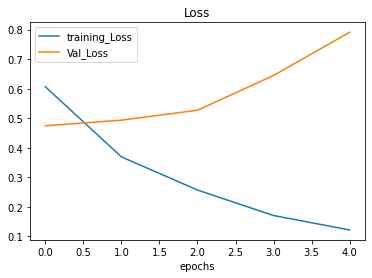

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

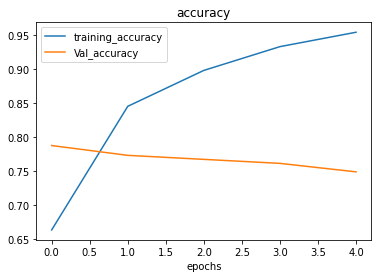

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy','Val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')